## Lab 6 - Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

#load dataset
df = pd.read_csv(drive_path + 'diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Exploration

In [2]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (520, 17)
List of attributes:  Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itc

None

In [3]:
#exploring basic distribution of numerical data
df.select_dtypes(['int64','float64']).describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [4]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [5]:
# Assuming 'positive' is the positive class and 'negative' is the negative class
class_mapping = {'Positive': 1, 'Negative': 0}
df['class'] = df['class'].replace(class_mapping).astype(int)

In [6]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

Gender :  ['Male', 'Female']
Polyuria :  ['No', 'Yes']
Polydipsia :  ['Yes', 'No']
sudden weight loss :  ['No', 'Yes']
weakness :  ['Yes', 'No']
Polyphagia :  ['No', 'Yes']
Genital thrush :  ['No', 'Yes']
visual blurring :  ['No', 'Yes']
Itching :  ['Yes', 'No']
Irritability :  ['No', 'Yes']
delayed healing :  ['Yes', 'No']
partial paresis :  ['No', 'Yes']
muscle stiffness :  ['Yes', 'No']
Alopecia :  ['Yes', 'No']
Obesity :  ['Yes', 'No']


<AxesSubplot: xlabel='class', ylabel='count'>

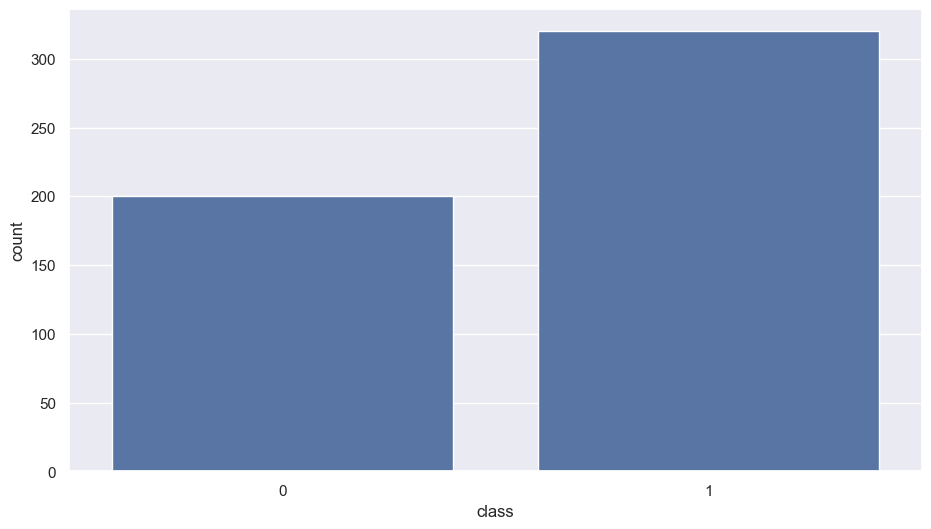

In [7]:
sns.countplot(x='class', data = df)

In [8]:
#replace with NaN
df_cat = df.select_dtypes(['object'])
df_cat.replace(['unknown','nonexistent'],np.nan,inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
dtypes: object(15)
memory usage: 61.1+ KB


<AxesSubplot: >

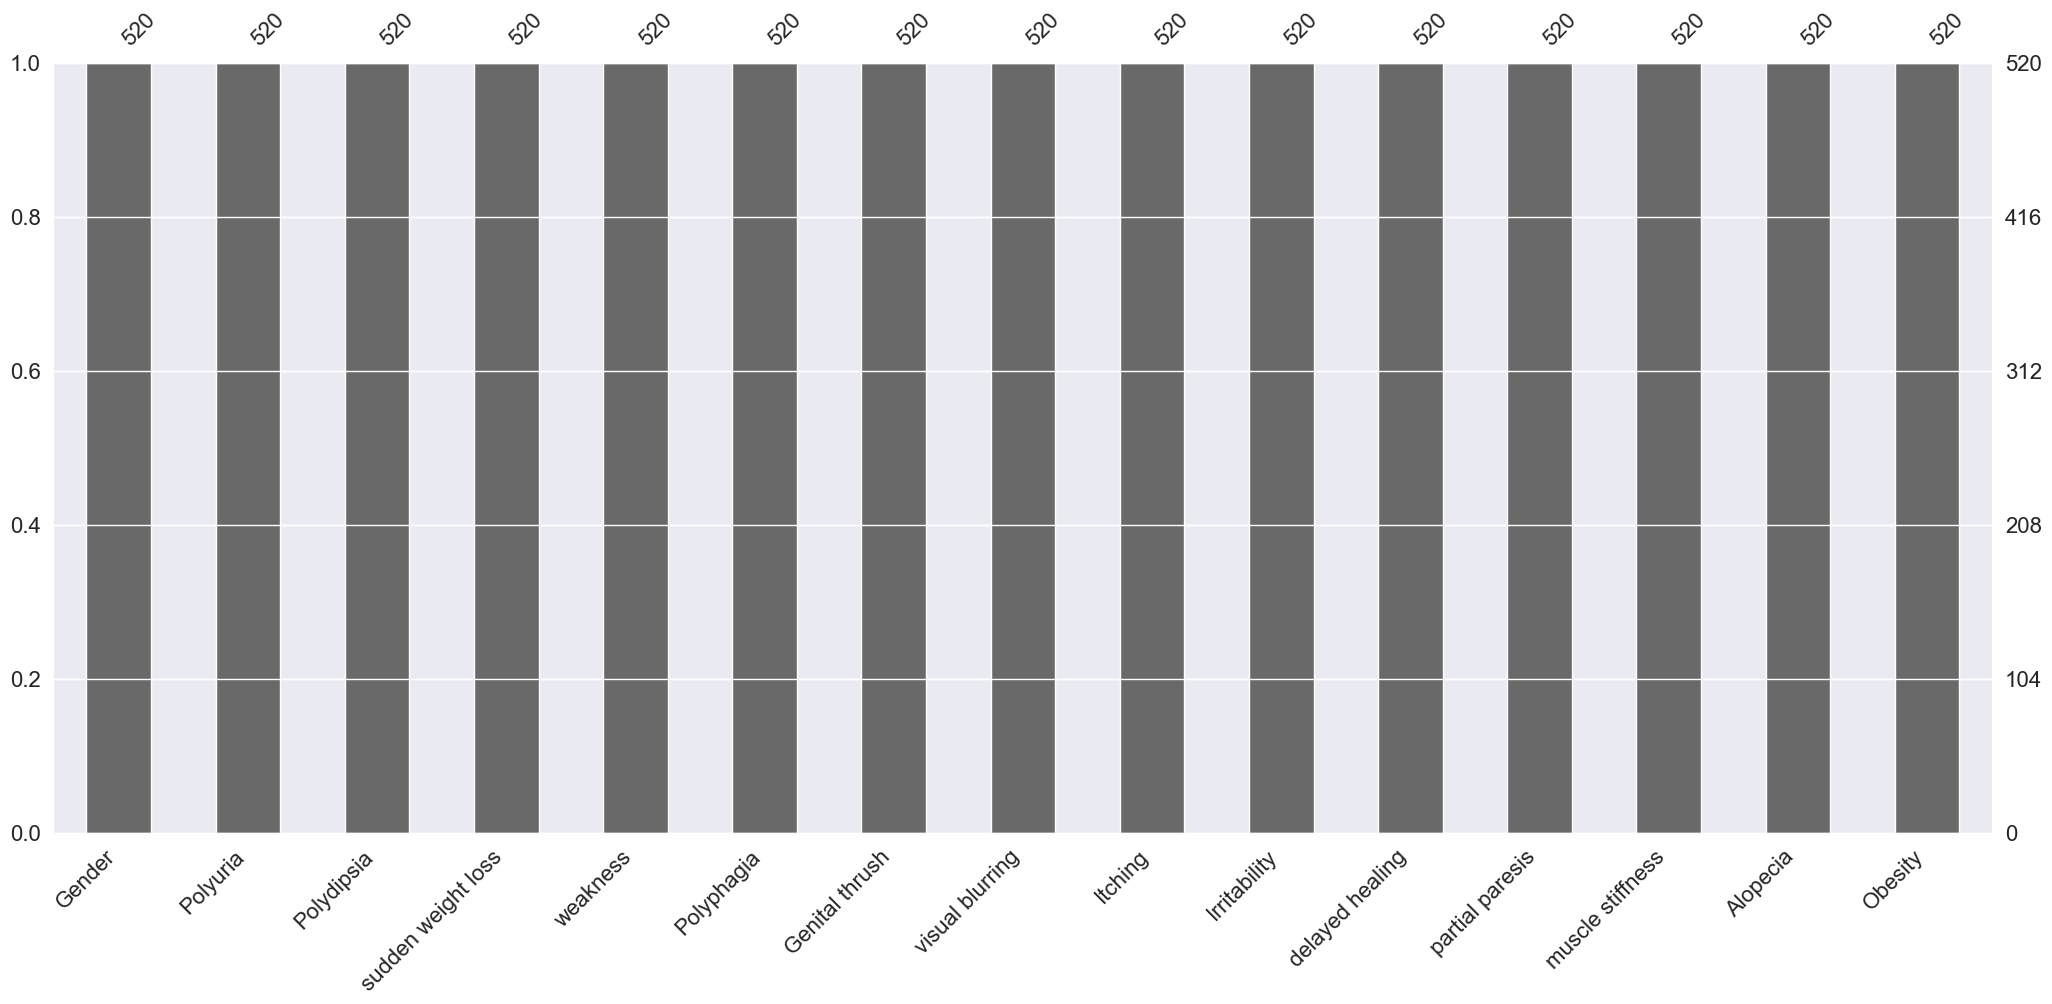

In [9]:
import missingno as msno

msno.bar(df_cat) #visualilze missing data in categorical attributes

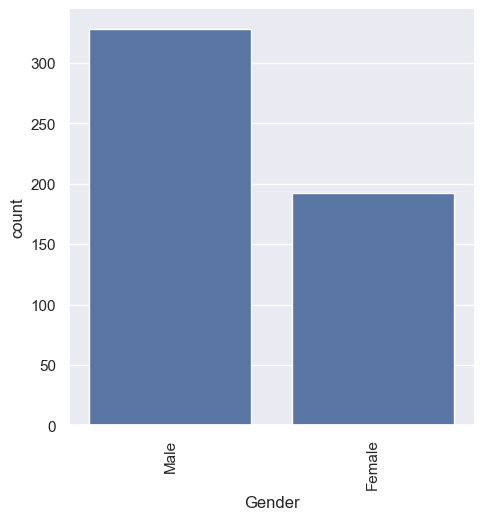

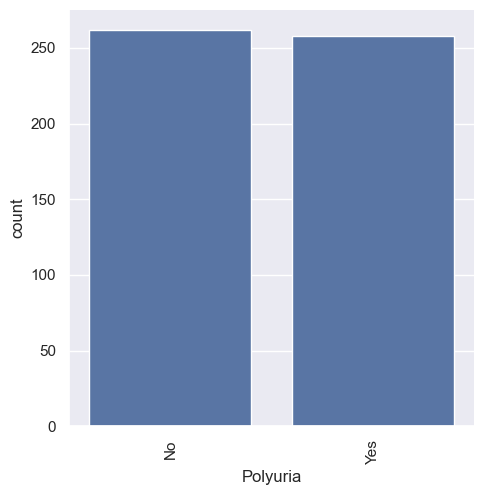

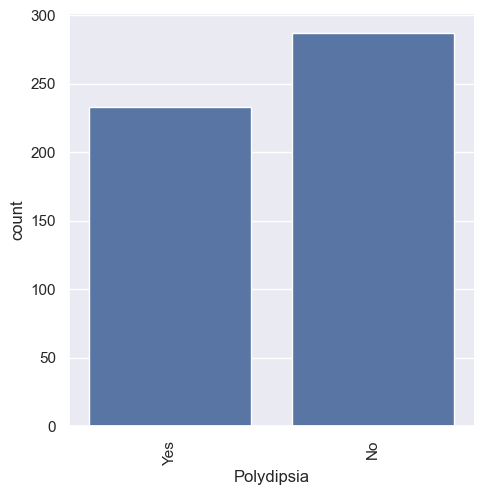

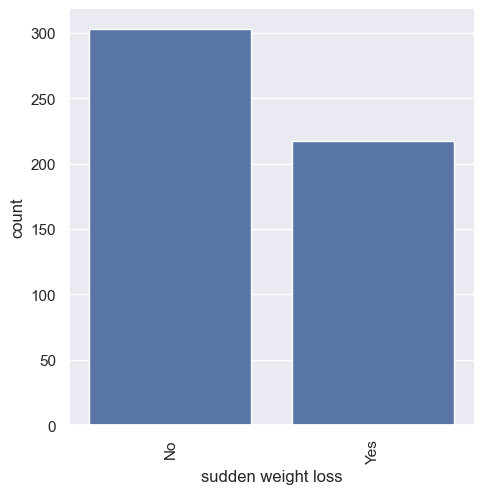

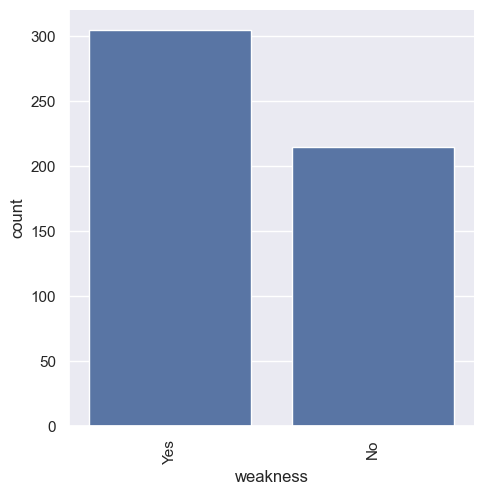

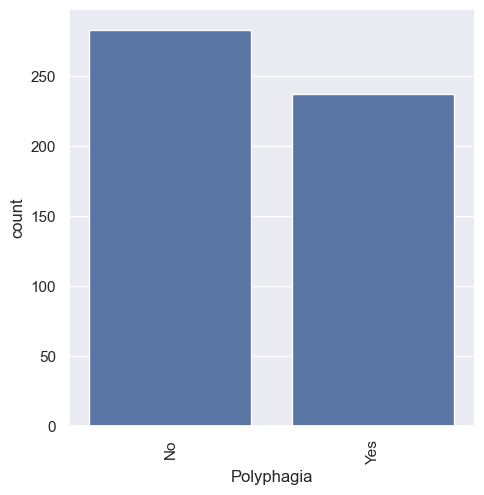

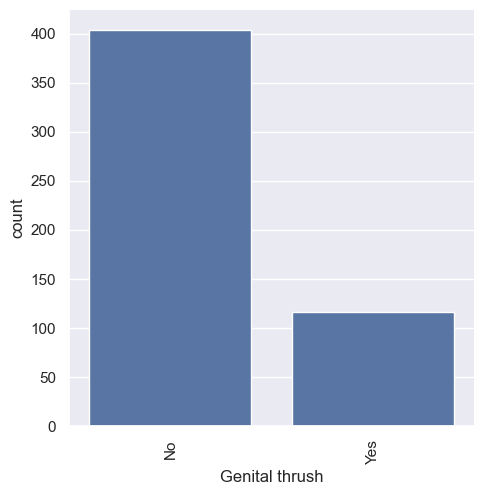

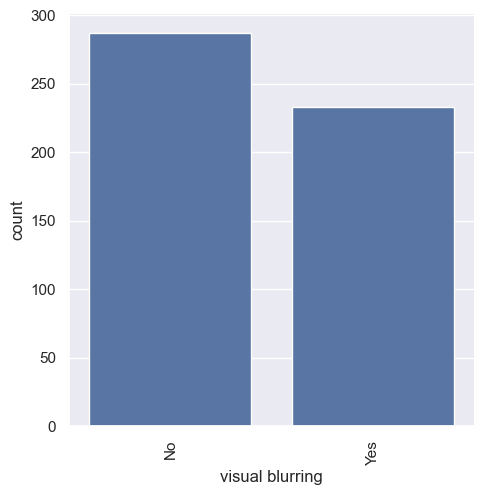

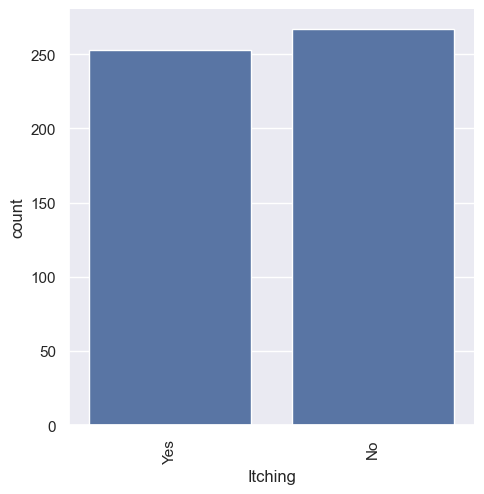

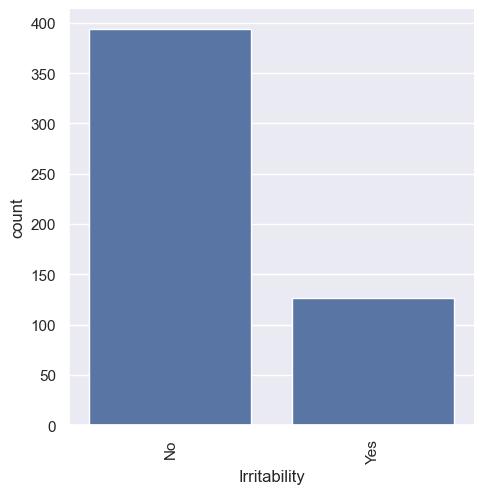

In [10]:
for i in range(10):
  ax = sns.catplot(data=df,x=cat_attributes[i],kind='count')
  ax.set_xticklabels(rotation=90)

## Data Preprocessing

In [11]:
df_pp = df.copy()
for i in cat_attributes:
  values = df_pp[i].unique().tolist()
  print(i,': ',values)

Gender :  ['Male', 'Female']
Polyuria :  ['No', 'Yes']
Polydipsia :  ['Yes', 'No']
sudden weight loss :  ['No', 'Yes']
weakness :  ['Yes', 'No']
Polyphagia :  ['No', 'Yes']
Genital thrush :  ['No', 'Yes']
visual blurring :  ['No', 'Yes']
Itching :  ['Yes', 'No']
Irritability :  ['No', 'Yes']
delayed healing :  ['Yes', 'No']
partial paresis :  ['No', 'Yes']
muscle stiffness :  ['Yes', 'No']
Alopecia :  ['Yes', 'No']
Obesity :  ['Yes', 'No']


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Check if 'class' column exists and is not empty
target_column = 'class'
if target_column in df_pp.columns and not df_pp[target_column].empty:
    X = df_pp.loc[:, df_pp.columns != target_column]
    y = df_pp.loc[:, df_pp.columns == target_column]

    # Check for missing values in 'class'
    if y.isnull().values.any():
        print("There are missing values in the 'class' column.")
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)
else:
    print(f"The '{target_column}' column is missing or empty in the DataFrame.")

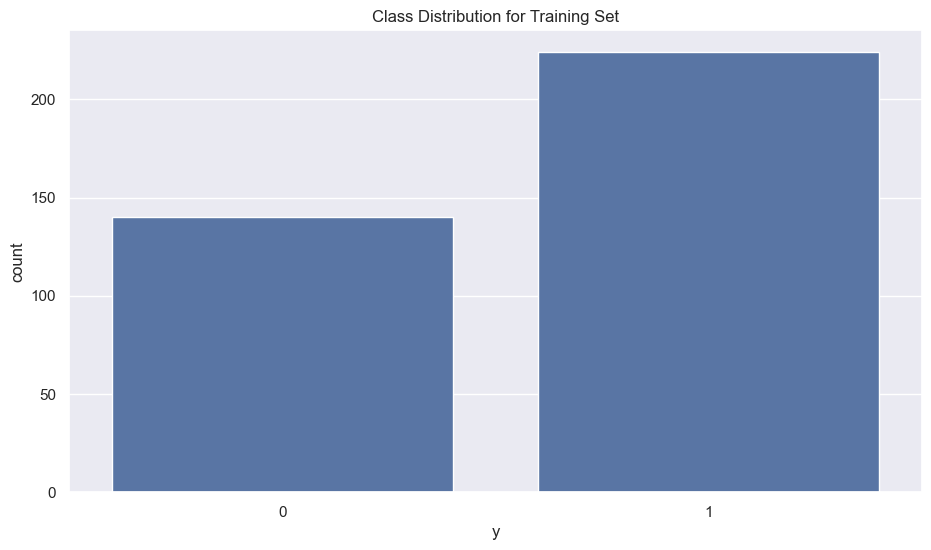

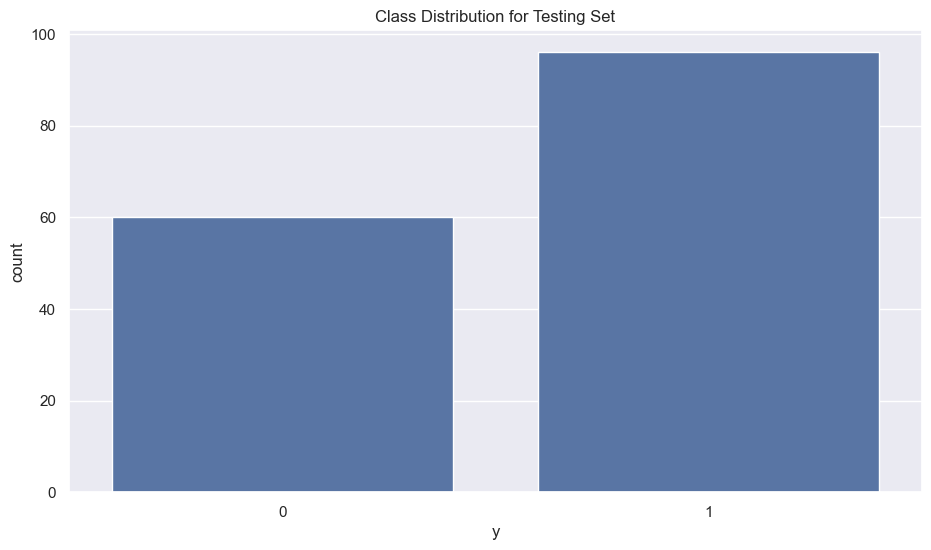

In [13]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

In [14]:
display(X_test)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
33,54,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
209,43,Male,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No
451,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
89,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No
441,60,Male,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
28,38,Male,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Yes,No
444,30,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No
465,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [15]:
# # Check if 'class' column is in X_train
# target_column = 'class'
# if target_column in X_train.columns:
#     cat_index = [X_train.columns.get_loc(i) for i in cat_attributes]
#     display(cat_index)
# else:
#     print(f"The '{target_column}' column is not present in X_train.")

#get index of categorical attributes
cat_index = []
for i in cat_attributes:
  cat_index.append(X_train.columns.get_loc(i))
display(cat_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
#normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_preprocess = X_train.copy()
num_attributes = X_train.select_dtypes(['int64','float64']).columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])
# X_train_preprocess = pd.DataFrame(X_train_preprocess, columns = num_attributes)
display(X_train_preprocess)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
224,0.661538,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No
269,0.353846,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
162,0.153846,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No
115,0.307692,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No
278,0.200000,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.600000,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
425,0.569231,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
334,0.323077,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No
76,0.353846,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No


In [17]:
from imblearn.over_sampling import SMOTENC

ovr_samp = SMOTENC(random_state=0, categorical_features=cat_index)
X_ovr_samp,y_ovr_samp=ovr_samp.fit_resample(X_train_preprocess, y_train)
X_ovr_samp = pd.DataFrame(data=X_ovr_samp,columns=X_train_preprocess.columns)

In [18]:
X_ovr_samp.shape

(448, 16)

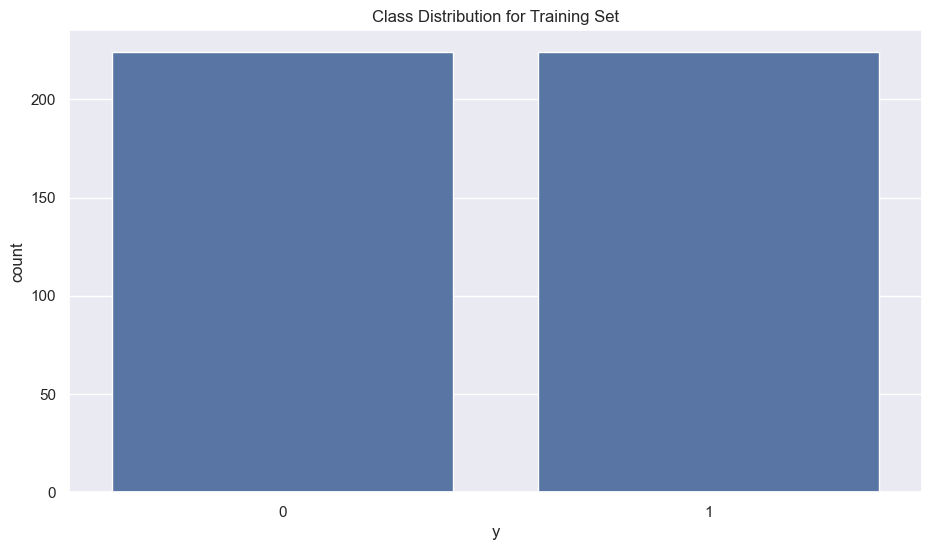

In [19]:
plt.figure()
sns.countplot(x='y', data = pd.DataFrame(data=y_ovr_samp,columns=['y']))
plt.title('Class Distribution for Training Set')
plt.show()

In [20]:
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test], axis=0) #concatenate the training and testing attributes
X_train_test_onehot = pd.get_dummies(X_train_test, columns=cat_attributes) #convert categorical attributes to one hot encoding format
#split the training and testing attributes back into individual variables
X_train_onehot = X_train_test_onehot[:X_train_rows]
X_test_onehot = X_train_test_onehot[X_train_rows:]

display(X_train_onehot)

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,0.661538,False,True,True,False,True,False,True,False,False,...,False,True,True,False,True,False,False,True,True,False
1,0.353846,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,True,True,False,True,False
2,0.153846,True,False,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3,0.307692,True,False,False,True,False,True,False,True,False,...,False,True,False,True,True,False,True,False,True,False
4,0.200000,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.370350,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,False,True,True,False
444,0.049238,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
445,0.292308,False,True,False,True,True,False,False,True,False,...,False,True,True,False,True,False,False,True,False,True
446,0.307692,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
